In [173]:
import pandas as pd

In [174]:
df = pd.read_csv('penguins.csv')

In [175]:
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [177]:
df.drop(columns={'Unnamed: 0'}, inplace=True)

In [178]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

# média e mediana

In [179]:
df['bill_length_mm'].agg(['mean', 'median'])

mean      43.92193
median    44.45000
Name: bill_length_mm, dtype: float64

In [180]:
df['bill_depth_mm'].agg(['mean', 'median'])

mean      17.15117
median    17.30000
Name: bill_depth_mm, dtype: float64

In [181]:
df['flipper_length_mm'].agg(['mean', 'median'])

mean      200.915205
median    197.000000
Name: flipper_length_mm, dtype: float64

In [182]:
df['body_mass_g'].agg(['mean', 'median'])

mean      4201.754386
median    4050.000000
Name: body_mass_g, dtype: float64

# resolver o NaN

In [183]:
df[df['bill_depth_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


In [184]:
colunas_numericas = df.columns[2:6]

In [185]:
df[colunas_numericas] = df.groupby('species')[colunas_numericas].transform(lambda x: x.fillna(x.median()))

In [186]:
df.isna().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
year                  0
dtype: int64

In [187]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

# criar df treinamento

In [188]:
df_treinamento = df.copy()

In [189]:
df_treinamento.drop(columns={'year', 'sex'}, inplace=True)

In [190]:
df_treinamento.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,38.8,18.4,190.0,3700.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0


In [191]:
factorize, _  = pd.factorize(df_treinamento['island'])
df_treinamento['island_encoded'] = factorize

In [192]:
factorize, _ = pd.factorize(df_treinamento['island'])

In [193]:
df_treinamento.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_encoded
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
3,Adelie,Torgersen,38.8,18.4,190.0,3700.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0


In [194]:
df_treinamento.drop(columns={'island'}, inplace=True)

In [195]:
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

# bibliotecas aprendizagem de máquina

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# preparação dos dados

In [197]:
y = df_treinamento.pop('species')

In [198]:
x = df_treinamento.copy()

In [199]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

In [200]:
x_treino.shape, x_teste.shape

((275, 5), (69, 5))

In [201]:
y_treino.shape, y_teste.shape

((275,), (69,))

In [202]:
rf_model = RandomForestClassifier()

In [203]:
rf_model.fit(x_treino, y_treino)

RandomForestClassifier()

# árvore

In [204]:
clf = tree.DecisionTreeClassifier()

In [205]:
clf.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [206]:
clf.score(x_teste, y_teste)

1.0

In [207]:
y_pred = clf.predict(x_teste)

In [208]:
accuracy_score(y_teste, y_pred)

1.0

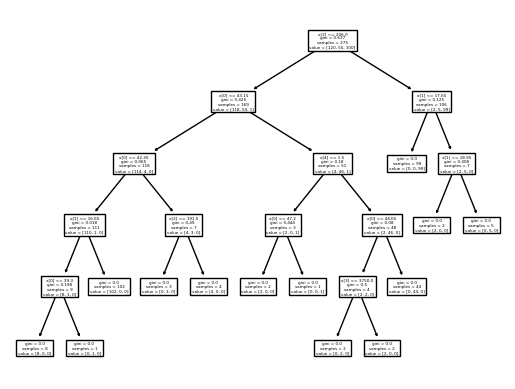

In [209]:
tree.plot_tree(clf);

# avaliação do modelo

In [210]:
rf_model.score(x_treino, y_treino)

1.0

In [211]:
rf_model.score(x_teste, y_teste)

1.0

In [212]:
y_pred = rf_model.predict(x_teste)

In [213]:
accuracy_score(y_teste, y_pred)

1.0

In [214]:
rf_model.predict(x_teste)

array(['Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie'], dtype=object)

In [215]:
x_teste.iloc[[0]]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_encoded
194,45.3,13.7,210.0,4300.0,1


In [216]:
rf_model.predict(x_teste.iloc[[0]])

array(['Gentoo'], dtype=object)

In [217]:
df.iloc[194, :]

species              Gentoo
island               Biscoe
bill_length_mm         45.3
bill_depth_mm          13.7
flipper_length_mm     210.0
body_mass_g          4300.0
sex                  female
year                   2008
Name: 194, dtype: object

In [218]:
df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

# visualização da árvore

In [219]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [220]:
arvore = rf_model.estimators_[2]

In [221]:
dot_data = export_graphviz(arvore, out_file=None, rounded=True, filled=True)

In [222]:
graph = pydotplus.graph_from_dot_data(dot_data)

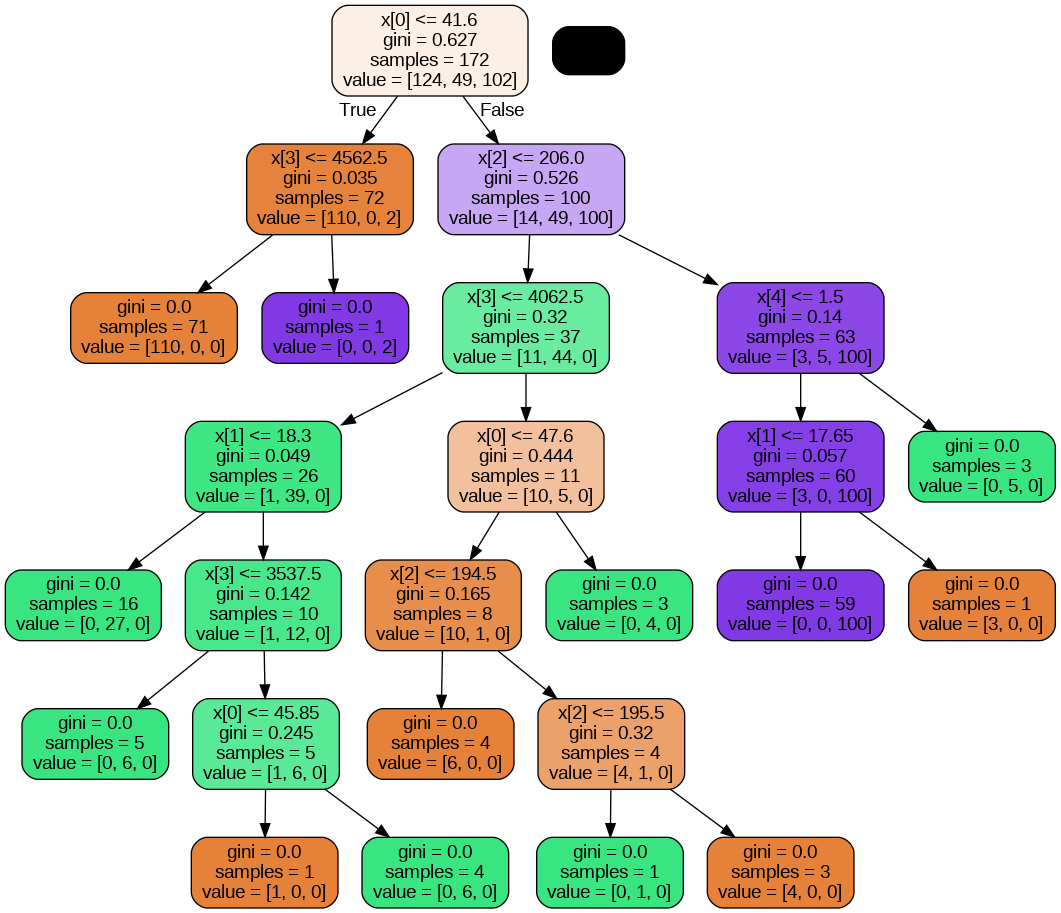

In [223]:
Image(graph.create_png())

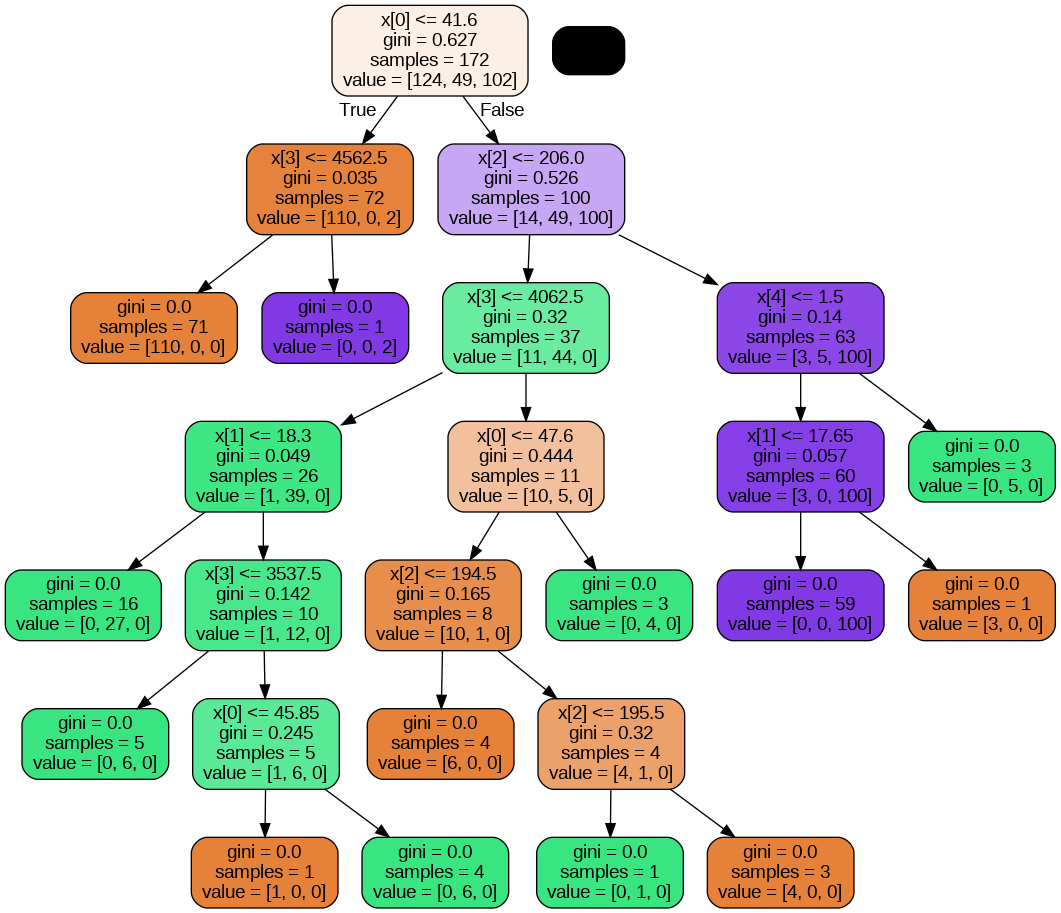

In [224]:
Image(graph.create_png())